# Individual assignment
## Danyang Chen 03.11
---
1. Consider the matrix list `x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]`.   
    (a) Write a list comprehension to extract the last column of the matrix `[3, 6, 9]`.   
    (b) Write another list comprehension to create a vector of twice the square of the middle column `[8, 50, 128]`.

In [2]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# (a)
ans1 = list(x[:, 2])
print("(a): ", ans1)
# (b)
ans2 = list(2*x[:, 1]**2)
print("(b): ", ans2)


(a):  [3, 6, 9]
(b):  [8, 50, 128]


---
2. Perform the following tasks with `NumPy` arrays. All of them can be done (elegantly) in 1 to 3 lines.  
    (a) Create an 8$\times$8 array with ones on all the edges and zeros everywhere else.  
    (b) Create an 8$\times$8 array of integers with a checkerboard pattern of ones and zeros.  
    (c) Given the array `c = np.arange(2, 50, 5)`, make all the numbers not divisible by 3 negative.  
    (d) Find the size, shape, mean, and standard deviation of the arrays you created in parts (a)–(c).  

In [3]:
# (a)
mat8_a = np.ones((8, 8))
mat6 = np.zeros((6,6))
mat8_a[1:-1, 1:-1] = mat6
print("(a): \n", mat8_a)

# (b)
mat8_b = np.zeros((8, 8))
mat8_b[::2, ::2] = 1
mat8_b[1::2, 1::2] = 1
print("\n(b): \n", mat8_b)

# (c)
c = np.arange(2, 50 ,5)
c[c % 3 != 0] *= -1
print("\n(c): \n", c)

# (d)
print("\n(d): \n(a): Size: {size:d}, shape: {shape}, mean: {mean:.2f}, stddev: {stddev:.2f}".format(size=mat8_a.size, shape=mat8_a.shape, mean=np.mean(mat8_a), stddev=np.std(mat8_a)))
print("(b): Size: {size:d}, shape: {shape}, mean: {mean:.2f}, stddev: {stddev:.2f}".format(size=mat8_b.size, shape=mat8_b.shape, mean=np.mean(mat8_b), stddev=np.std(mat8_b)))
print("(c): Size: {size:d}, shape: {shape}, mean: {mean:.2f}, stddev: {stddev:.2f}".format(size=c.size, shape=c.shape, mean=np.mean(c), stddev=np.std(c)))

(a): 
 [[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]

(b): 
 [[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]

(c): 
 [ -2  -7  12 -17 -22  27 -32 -37  42 -47]

(d): 
(a): Size: 64, shape: (8, 8), mean: 0.44, stddev: 0.50
(b): Size: 64, shape: (8, 8), mean: 0.50, stddev: 0.50
(c): Size: 10, shape: (10,), mean: -8.30, stddev: 27.16


---
3. Write a program to calculate the perimeter $p$ of an $n$-gon inscribed inside a sphere of diameter 1. Find $p$ for $n = 3, 4, 5, 100, 10,000$, and $1,000,000$. Your answers should be

    | $n$ | $p$ | $n$ | $p$ |
    | --- | --- | ---: |---|
    | 3 | 2.59807621135 | 100 | 3.14107590781|
    | 4 | 2.82842712475| 10,000| 3.14159260191|
    | 5 |2.93892626146 | 1,000,000 | 3.14159265358|
    (a) Please print out your results of $p$ as formatted strings on screen, keeping 12 significant figures for each $p$.  
    (b) Save the values of $n$ and $p$ in a *csv* file.  
    (c) Save the value of $n$ and $p$ as a `NumPy` array in a *npz* file.  
    (d) Use the module `matplotlib.pyplot` to make a semi-log plot of $p$ versus $n$. What conclusion can you make from the plot?  

(a):  [ 2.598076211353  2.828427124746  2.938926261462  3.141075907813
  3.141592601913  3.141592653585]


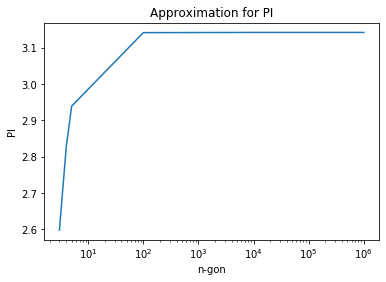

In [12]:
def findPI(n):
    angle = 2 * np.pi / 2 / n
    perimeter = 0.5 * np.sin(angle) * 2 * n
    return perimeter
n = np.array([3,4,5,100,10000,1000000])

# (a)
p = findPI(n)
np.set_printoptions(formatter={'float': '{: .12f}'.format})
print("(a): ", p)

# (b)
import pandas as pd
data = {'n': n, 'p': p}
pd.DataFrame(data).to_csv("./output/n_p.csv")

# (c)
np.savez("./output/n_p.npz", n=n, p=p)
# ld = np.load("./output/n_p.npz") a test for reload the data
# print(ld['n'], ld['p'])

# (d)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n, p)
plt.title("Approximation for PI")
plt.xlabel("n-gon")
plt.ylabel("PI")
plt.xscale('log')
plt.show()
plt.close()

#### Q3 Conclusion
The approximation presicion grows smaller and smaller when the number of edges increases. 

---
4. The position of a ball at time $t$ dropped with zero initial velocity from a height $h_0$ is given by 
$$
y = h_0-\cfrac{1}{2}gt^2
$$
where $g = 9.8$ m/s$^2$. Suppose $h_0 = 10$ m.  
    (a) Find the sequence of times when the ball passes each half meter assuming the ball is dropped at $t = 0$. It should yield the following results for the $y$ and $t$ arrays:  
    `
    In [1]: y  
    Out[1]: array([10., 9.5, 9., 8.5, 8.0, 7.5, 7., 6.5, 6,. 5.5, 5., 4.5, 4., 3.5, 3., 2.5, 2., 1.5, 1.0, 0.5])  
    In [2]: t  
    OUt[2]: array([0. , 0.31943828, 0.45175395, 0.55328334, 0.63887656, 0.71428571, 0.7824608 , 0.84515425, 0.9035079, 0.95831485, 1.01015254, 1.05945693, 1.10656667, 1.15175111, 1.19522861, 1.23717915, 1.27775313, 1.31707778, 1.35526185, 1.39239919])  
    `  
    Once you have created the arrays `y` and `t`, try with `list(zip(t, y))`. Can you explain the result?  
    (b) Recalling that the average velocity over an interval $\Delta t$ is defined as $\bar{v} = \Delta y/\Delta t$, find the average velocity for each time interval in the part (a) using `NumPy` arrays.  
    (c) Calculate the acceleration as a function of time using the formula $\bar{a} = \Delta v/\Delta t$. Take care, as you will need to define a new time array `t_mid` that corresponds to the times where the velocities are calculated, which is midway between the times in the original time array.  
    (d) Please use the module `matplotlib.pyplot` to make a plot of `v` versus `t` and a plot of `a` versus `t_mid`. Can you justify your solutions?  

(a):
 y:  [ 10.000000000000  9.500000000000  9.000000000000  8.500000000000
  8.000000000000  7.500000000000  7.000000000000  6.500000000000
  6.000000000000  5.500000000000  5.000000000000  4.500000000000
  4.000000000000  3.500000000000  3.000000000000  2.500000000000
  2.000000000000  1.500000000000  1.000000000000  0.500000000000] 
t:  [ 0.000000000000  0.319438282500  0.451753951453  0.553283335172
  0.638876565000  0.714285714286  0.782460796436  0.845154254729
  0.903507902905  0.958314847500  1.010152544552  1.059456926728
  1.106566670345  1.151751106900  1.195228609334  1.237179148263
  1.277753130000  1.317077779613  1.355261854358  1.392399192116]

list and zip:  [(0.0, 10.0), (0.3194382824999699, 9.5), (0.4517539514526256, 9.0), (0.5532833351724881, 8.5), (0.6388765649999398, 8.0), (0.7142857142857143, 7.5), (0.7824607964359516, 7.0), (0.8451542547285166, 6.5), (0.9035079029052512, 6.0), (0.9583148474999098, 5.5), (1.0101525445522108, 5.0), (1.0594569267279519, 4.5), (1.10

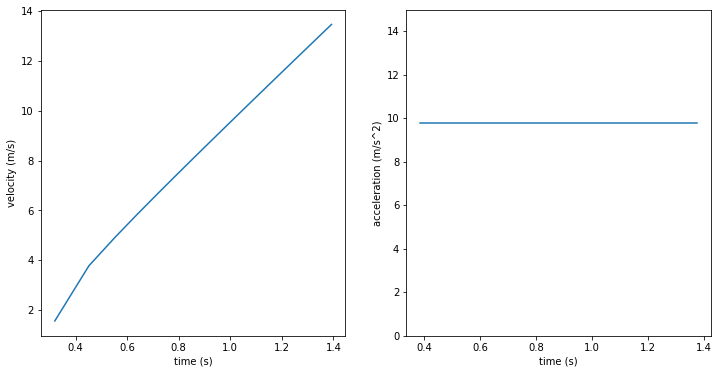

In [18]:
# (a)
y = np.linspace(10, 0.5, 20)
t = np.sqrt((10 - y) * 2 / 9.8) 
print("(a):\n y: ", y, "\nt: ", t)
ans4 = list(zip(t, y))
print("\nlist and zip: ", ans4)

# (b)
v = 0.5 / (t[1:] - t[:-1])
print("\n(b): \nv: ", v)

# (c)
t_mid = (t[1:] + t[:-1]) / 2
a = (v[1:] - v[:-1]) / (t_mid[1:] - t_mid[:-1])
print("\n(c): \na: ", a)

# (d)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t[1:], v)
plt.ylabel("velocity (m/s)")
plt.xlabel("time (s)")

plt.subplot(1, 2, 2)
plt.plot(t_mid[1:], a)
plt.ylabel("acceleration (m/s^2)")
plt.xlabel("time (s)")
plt.ylim(0, 15)

plt.show()
plt.close()